## Backtesting 

In [ ]:
This programming shows how to perform Backtesting to compare the performance of two investment strategies.

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import datetime

# Activating Yahoo Finance workaround in pandas_datareader
yf.pdr_override()

# Setting the start and end dates
start_date = '2018-01-01'
end_date = '2023-12-16'

# Fetching data for BTC-USD, VOO, and VGT
btc_data = pdr.get_data_yahoo('BTC-USD', start=start_date, end=end_date)
voo_data = pdr.get_data_yahoo('VOO', start=start_date, end=end_date)
vgt_data = pdr.get_data_yahoo('VGT', start=start_date, end=end_date)

btc_data.head(), voo_data.head(), vgt_data.head()  # Displaying the first few rows of each dataframe

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(                    Open          High           Low         Close  \
 Date                                                                 
 2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
 2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
 2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
 2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
 2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   
 
                Adj Close       Volume  
 Date                                   
 2018-01-01  13657.200195  10291200000  
 2018-01-02  14982.099609  16846600192  
 2018-01-03  15201.000000  16871900160  
 2018-01-04  15599.200195  21783199744  
 2018-01-05  17429.500000  23840899072  ,
                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2018-01-02  246.149994  247.089996  245.740005  247.089996  22

In [2]:
import pandas as pd

# Definiendo la ruta completa del archivo
ruta_archivo = 'C:\\Users\\octa-\\Downloads\\Para subir\\financial_data.xlsx'

# Creando un nuevo archivo Excel y escribiendo cada DataFrame en una hoja diferente
with pd.ExcelWriter(ruta_archivo) as writer:
    btc_data.to_excel(writer, sheet_name='BTC-USD')
    voo_data.to_excel(writer, sheet_name='VOO')
    vgt_data.to_excel(writer, sheet_name='VGT')

print(f"Archivo Excel creado con éxito en {ruta_archivo}.")

Archivo Excel creado con éxito en C:\Users\octa-\Downloads\Para subir\financial_data.xlsx.


In [3]:
# Definiendo los montos de inversión mensual
inversion_btc = 600  # USD en Bitcoin
inversion_vgt = 400  # USD en VGT
inversion_voo = 1000  # USD en VOO

# Función para calcular el valor acumulado de la inversión
def calcular_valor_acumulado(data, inversion, start_date, end_date):
    # Obteniendo los últimos días hábiles de cada mes en el rango de fechas
    monthly_dates = pd.date_range(start=start_date, end=end_date, freq='BM')
    # Filtrando los datos para estos días
    monthly_data = data.loc[data.index.intersection(monthly_dates)]

    # Inicializando el valor acumulado y las unidades compradas
    valor_acumulado = 0
    unidades_compradas = 0

    # Iterando sobre cada mes
    for fecha, fila in monthly_data.iterrows():
        # Calculando las unidades compradas este mes (inversión dividida por el precio de cierre)
        unidades_mes = inversion / fila['Close']
        # Actualizando el total de unidades compradas
        unidades_compradas += unidades_mes
        # Actualizando el valor acumulado
        valor_acumulado = unidades_compradas * fila['Close']

    return valor_acumulado

# Calculando el valor acumulado de cada inversión
valor_acumulado_btc = calcular_valor_acumulado(btc_data, inversion_btc, start_date, end_date)
valor_acumulado_vgt = calcular_valor_acumulado(vgt_data, inversion_vgt, start_date, end_date)
valor_acumulado_voo = calcular_valor_acumulado(voo_data, inversion_voo, start_date, end_date)

# Sumando los valores para obtener el valor total de la cartera
valor_total_cartera = valor_acumulado_btc + valor_acumulado_vgt + valor_acumulado_voo

valor_total_cartera

272945.9164093685

In [4]:
#dinero invertido
2000*6*12

144000

In [5]:
# Definiendo los montos de inversión mensual
inversion_btc = 600  # USD en Bitcoin
inversion_vgt = 400  # USD en VGT
inversion_voo = 1000  # USD en VOO

# Función para calcular el valor acumulado de la inversión
def calcular_valor_acumulado(data, inversion, start_date, end_date):
    # Obteniendo los últimos días hábiles de cada mes en el rango de fechas
    monthly_dates = pd.date_range(start=start_date, end=end_date, freq='BM')
    # Filtrando los datos para estos días
    monthly_data = data.loc[data.index.intersection(monthly_dates)]

    # Inicializando el valor acumulado y las unidades compradas
    valor_acumulado = 0
    unidades_compradas = 0

    # Iterando sobre cada mes
    for fecha, fila in monthly_data.iterrows():
        # Calculando las unidades compradas este mes (inversión dividida por el precio de cierre)
        unidades_mes = inversion / fila['Close']
        # Actualizando el total de unidades compradas
        unidades_compradas += unidades_mes
        # Actualizando el valor acumulado
        valor_acumulado = unidades_compradas * fila['Close']

    return valor_acumulado

# Calculando el valor acumulado de cada inversión
valor_acumulado_btc = calcular_valor_acumulado(btc_data, inversion_btc, start_date, end_date)
valor_acumulado_vgt = calcular_valor_acumulado(vgt_data, inversion_vgt, start_date, end_date)
valor_acumulado_voo = calcular_valor_acumulado(voo_data, inversion_voo, start_date, end_date)

# Sumando los valores para obtener el valor total de la cartera
valor_total_cartera = valor_acumulado_btc + valor_acumulado_vgt + valor_acumulado_voo

valor_total_cartera

272945.9164093685

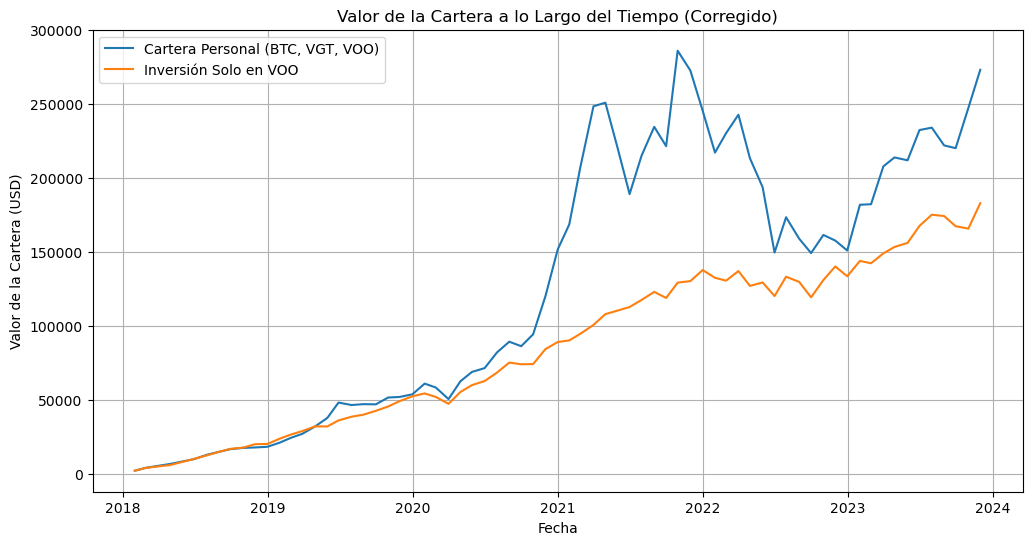

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Definiendo las inversiones mensuales y fechas de inicio y fin
inversion_btc = 600  # USD en Bitcoin
inversion_vgt = 400  # USD en VGT
inversion_voo = 1000  # USD en VOO
inversion_mensual_voo_comparativa = 2000  # USD invertidos mensualmente en VOO
start_date = '2018-01-01'
end_date = '2023-12-16'

# Función para calcular el valor acumulado mes a mes
def calcular_valor_acumulado_mensual(data, inversion, start_date, end_date):
    monthly_dates = pd.date_range(start=start_date, end=end_date, freq='BM')
    monthly_data = data.loc[data.index.intersection(monthly_dates)]
    
    valores_acumulados = []
    unidades_compradas = 0

    for fecha, fila in monthly_data.iterrows():
        unidades_mes = inversion / fila['Close']
        unidades_compradas += unidades_mes
        valor_acumulado = unidades_compradas * fila['Close']
        valores_acumulados.append(valor_acumulado)

    return pd.Series(valores_acumulados, index=monthly_data.index)

# Calculando los valores acumulados mes a mes para cada cartera
valores_acumulados_btc = calcular_valor_acumulado_mensual(btc_data, inversion_btc, start_date, end_date)
valores_acumulados_vgt = calcular_valor_acumulado_mensual(vgt_data, inversion_vgt, start_date, end_date)
valores_acumulados_voo = calcular_valor_acumulado_mensual(voo_data, inversion_voo, start_date, end_date)
valores_acumulados_voo_comparativa = calcular_valor_acumulado_mensual(voo_data, inversion_mensual_voo_comparativa, start_date, end_date)

# Sumando los valores de las tres inversiones para obtener el valor de la cartera personal en cada momento
valores_cartera_personal = valores_acumulados_btc + valores_acumulados_vgt + valores_acumulados_voo

# Alineando las fechas y rellenando los posibles huecos con interpolación
fechas_completas = pd.date_range(start=start_date, end=end_date, freq='BM')
valores_cartera_personal_alineados = valores_cartera_personal.reindex(fechas_completas).interpolate()
valores_voo_comparativa_alineados = valores_acumulados_voo_comparativa.reindex(fechas_completas).interpolate()

# Graficando
plt.figure(figsize=(12, 6))
plt.plot(valores_cartera_personal_alineados.index, valores_cartera_personal_alineados, label='Cartera Personal (BTC, VGT, VOO)')
plt.plot(valores_voo_comparativa_alineados.index, valores_voo_comparativa_alineados, label='Inversión Solo en VOO')
plt.title('Valor de la Cartera a lo Largo del Tiempo (Corregido)')
plt.xlabel('Fecha')
plt.ylabel('Valor de la Cartera (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import pandas as pd
from scipy.stats import norm

# Definiendo las inversiones mensuales y las fechas de inicio y fin
inversion_btc = 600  # USD en Bitcoin
inversion_vgt = 400  # USD en VGT
inversion_voo = 1000  # USD en VOO
inversion_mensual_voo_comparativa = 2000  # USD invertidos mensualmente en VOO
start_date = '2018-01-01'
end_date = '2023-12-16'

# Funciones para calcular el valor acumulado y otras estadísticas
def calcular_valor_acumulado_mensual(data, inversion, start_date, end_date):
    monthly_dates = pd.date_range(start=start_date, end=end_date, freq='BM')
    monthly_data = data.loc[data.index.intersection(monthly_dates)]
    valores_acumulados = []
    unidades_compradas = 0
    for fecha, fila in monthly_data.iterrows():
        unidades_mes = inversion / fila['Close']
        unidades_compradas += unidades_mes
        valor_acumulado = unidades_compradas * fila['Close']
        valores_acumulados.append(valor_acumulado)
    return pd.Series(valores_acumulados, index=monthly_data.index)

# Calculando el número de años para el periodo de inversión
años_inversion = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days / 365.25

# Calculando los valores acumulados mes a mes
valores_acumulados_personal = (calcular_valor_acumulado_mensual(btc_data, inversion_btc, start_date, end_date) +
                               calcular_valor_acumulado_mensual(vgt_data, inversion_vgt, start_date, end_date) +
                               calcular_valor_acumulado_mensual(voo_data, inversion_voo, start_date, end_date))
valores_acumulados_voo_comparativa = calcular_valor_acumulado_mensual(voo_data, inversion_mensual_voo_comparativa, start_date, end_date)

# Alineando las fechas
fechas_completas = pd.date_range(start=start_date, end=end_date, freq='BM')
valores_acumulados_personal = valores_acumulados_personal.reindex(fechas_completas).interpolate()
valores_acumulados_voo_comparativa = valores_acumulados_voo_comparativa.reindex(fechas_completas).interpolate()

# Calculando estadísticas
retorno_acumulado_personal = (valores_acumulados_personal.iloc[-1] / valores_acumulados_personal.iloc[0] - 1) * 100
tasa_interes_compuesta_personal = ((valores_acumulados_personal.iloc[-1] / valores_acumulados_personal.iloc[0]) ** (1 / años_inversion) - 1) * 100
desviacion_estandar_personal = valores_acumulados_personal.pct_change().dropna().std() * 100
sharpe_ratio_personal = valores_acumulados_personal.pct_change().dropna().mean() / valores_acumulados_personal.pct_change().dropna().std()

retorno_acumulado_voo = (valores_acumulados_voo_comparativa.iloc[-1] / valores_acumulados_voo_comparativa.iloc[0] - 1) * 100
tasa_interes_compuesta_voo = ((valores_acumulados_voo_comparativa.iloc[-1] / valores_acumulados_voo_comparativa.iloc[0]) ** (1 / años_inversion) - 1) * 100
desviacion_estandar_voo = valores_acumulados_voo_comparativa.pct_change().dropna().std() * 100
sharpe_ratio_voo = valores_acumulados_voo_comparativa.pct_change().dropna().mean() / valores_acumulados_voo_comparativa.pct_change().dropna().std()

# Creando la tabla
tabla_estadisticas = pd.DataFrame({
    'Indicador': ['Retorno Acumulado (%)', 'Tasa de Interés Compuesta Anual (%)', 'Desviación Estándar de Retornos (%)', 'Sharpe Ratio'],
    'Cartera Personal (BTC, VGT, VOO)': [retorno_acumulado_personal, tasa_interes_compuesta_personal, desviacion_estandar_personal, sharpe_ratio_personal],
    'Inversión Solo en VOO': [retorno_acumulado_voo, tasa_interes_compuesta_voo, desviacion_estandar_voo, sharpe_ratio_voo]
})

tabla_estadisticas.set_index('Indicador', inplace=True)
tabla_estadisticas

,"Cartera Personal (BTC, VGT, VOO)",Inversión Solo en VOO
Indicador,,
Retorno Acumulado (%),13547.295820,9039.932029
Tasa de Interés Compuesta Anual (%),128.318228,113.453451
Desviación Estándar de Retornos (%),16.586023,13.649091
Sharpe Ratio,0.504260,0.537091


In [8]:
# Ajustando la inversión inicial para cada activo
inversion_inicial_btc = 30  # USD en Bitcoin
inversion_inicial_vgt = 20  # USD en VGT
inversion_inicial_voo = 50  # USD en VOO para la cartera mixta y 100 USD para la cartera de VOO solo

# Calculando el valor inicial de las carteras
valor_inicial_btc = inversion_inicial_btc / btc_data['Close'].iloc[0]
valor_inicial_vgt = inversion_inicial_vgt / vgt_data['Close'].iloc[0]
valor_inicial_voo_cartera_mixta = inversion_inicial_voo / voo_data['Close'].iloc[0]
valor_inicial_voo_solo = 100 / voo_data['Close'].iloc[0]

# Calculando el valor de la cartera a lo largo del tiempo
valor_cartera_mixta = (valor_inicial_btc * btc_data['Close']) + (valor_inicial_vgt * vgt_data['Close']) + (valor_inicial_voo_cartera_mixta * voo_data['Close'])
valor_cartera_voo_solo = valor_inicial_voo_solo * voo_data['Close']

# Retorno acumulado
retorno_acumulado_mixta = valor_cartera_mixta.iloc[-1] / valor_cartera_mixta.iloc[0] - 1
retorno_acumulado_voo_solo = valor_cartera_voo_solo.iloc[-1] / valor_cartera_voo_solo.iloc[0] - 1

# Tasa de Interés Compuesta Anual
tasa_interes_compuesta_mixta = (valor_cartera_mixta.iloc[-1] / valor_cartera_mixta.iloc[0]) ** (1 / años_inversion) - 1
tasa_interes_compuesta_voo_solo = (valor_cartera_voo_solo.iloc[-1] / valor_cartera_voo_solo.iloc[0]) ** (1 / años_inversion) - 1

# Desviación Estándar de los Retornos
desviacion_estandar_mixta = valor_cartera_mixta.pct_change().dropna().std()
desviacion_estandar_voo_solo = valor_cartera_voo_solo.pct_change().dropna().std()

# Correlación con el VOO
correlacion_con_voo = valor_cartera_mixta.pct_change().corr(valor_cartera_voo_solo.pct_change())

# Sharpe Ratio, asumiendo una tasa libre de riesgo de 0%
sharpe_ratio_mixta = valor_cartera_mixta.pct_change().mean() / desviacion_estandar_mixta
sharpe_ratio_voo_solo = valor_cartera_voo_solo.pct_change().mean() / desviacion_estandar_voo_solo

# Valor final de la cartera con aportes mensuales
valor_final_mixta = calcular_valor_acumulado(btc_data, inversion_btc, start_date, end_date) + \
                    calcular_valor_acumulado(vgt_data, inversion_vgt, start_date, end_date) + \
                    calcular_valor_acumulado(voo_data, inversion_voo, start_date, end_date)
valor_final_voo_solo = calcular_valor_acumulado(voo_data, inversion_mensual_voo_comparativa, start_date, end_date)

# Creando una tabla con las estadísticas
tabla_estadisticas_carteras = pd.DataFrame({
    'Indicador': ['Retorno Acumulado', 'Tasa de Interés Compuesta Anual', 
                  'Desviación Estándar de Retornos', 'Correlación con VOO', 'Sharpe Ratio', 'Valor Final de la Cartera'],
    'Cartera Mixta (BTC, VGT, VOO)': [retorno_acumulado_mixta, tasa_interes_compuesta_mixta, 
                                      desviacion_estandar_mixta, correlacion_con_voo, sharpe_ratio_mixta, valor_final_mixta],
    'Cartera Solo VOO': [retorno_acumulado_voo_solo, tasa_interes_compuesta_voo_solo, 
                         desviacion_estandar_voo_solo, 1, sharpe_ratio_voo_solo, valor_final_voo_solo]
})

tabla_estadisticas_carteras.set_index('Indicador', inplace=True)
tabla_estadisticas_carteras

,"Cartera Mixta (BTC, VGT, VOO)",Cartera Solo VOO
Indicador,,
Retorno Acumulado,NaN,0.752762
Tasa de Interés Compuesta Anual,NaN,0.098825
Desviación Estándar de Retornos,0.015611,0.013005
Correlación con VOO,0.740022,1.000000
Sharpe Ratio,0.032530,0.035324
Valor Final de la Cartera,272945.916409,182798.640580


In [9]:
# Corrigiendo el cálculo del retorno acumulado y la tasa de interés compuesta anual para la cartera mixta
retorno_acumulado_mixta = valor_cartera_mixta.iloc[-1] / 100 - 1  # 100 es la inversión inicial
tasa_interes_compuesta_mixta = (valor_cartera_mixta.iloc[-1] / 100) ** (1 / años_inversion) - 1

# Actualizando la tabla con los valores corregidos
tabla_estadisticas_carteras.loc['Retorno Acumulado', 'Cartera Mixta (BTC, VGT, VOO)'] = retorno_acumulado_mixta
tabla_estadisticas_carteras.loc['Tasa de Interés Compuesta Anual', 'Cartera Mixta (BTC, VGT, VOO)'] = tasa_interes_compuesta_mixta

tabla_estadisticas_carteras

,"Cartera Mixta (BTC, VGT, VOO)",Cartera Solo VOO
Indicador,,
Retorno Acumulado,1.375007,0.752762
Tasa de Interés Compuesta Anual,0.156341,0.098825
Desviación Estándar de Retornos,0.015611,0.013005
Correlación con VOO,0.740022,1.000000
Sharpe Ratio,0.032530,0.035324
Valor Final de la Cartera,272945.916409,182798.640580


In [11]:
import pandas as pd
import yfinance as yf

# Descargando los datos
btc_data = yf.download('BTC-USD', start='2018-01-01', end='2023-12-16')['Close']
voo_data = yf.download('VOO', start='2018-01-01', end='2023-12-16')['Close']
vgt_data = yf.download('VGT', start='2018-01-01', end='2023-12-16')['Close']

# Inversión inicial en cada activo
inversion_inicial_btc = 30  # USD en Bitcoin
inversion_inicial_vgt = 20  # USD en VGT
inversion_inicial_voo = 50  # USD en VOO para la cartera mixta y 100 USD para la cartera de VOO solo

# Valor inicial de las carteras
valor_inicial_btc = inversion_inicial_btc / btc_data.iloc[0]
valor_inicial_vgt = inversion_inicial_vgt / vgt_data.iloc[0]
valor_inicial_voo_cartera_mixta = inversion_inicial_voo / voo_data.iloc[0]
valor_inicial_voo_solo = 100 / voo_data.iloc[0]

# Valor de la cartera a lo largo del tiempo
valor_cartera_mixta = (valor_inicial_btc * btc_data) + (valor_inicial_vgt * vgt_data) + (valor_inicial_voo_cartera_mixta * voo_data)
valor_cartera_voo_solo = valor_inicial_voo_solo * voo_data

# Retorno acumulado
retorno_acumulado_mixta = valor_cartera_mixta.iloc[-1] / 100 - 1  # 100 es la inversión inicial
retorno_acumulado_voo_solo = valor_cartera_voo_solo.iloc[-1] / 100 - 1

# Tasa de Interés Compuesta Anual
años_inversion = (valor_cartera_mixta.index[-1] - valor_cartera_mixta.index[0]).days / 365.25
tasa_interes_compuesta_mixta = (valor_cartera_mixta.iloc[-1] / 100) ** (1 / años_inversion) - 1
tasa_interes_compuesta_voo_solo = (valor_cartera_voo_solo.iloc[-1] / 100) ** (1 / años_inversion) - 1

# Desviación Estándar de los Retornos
desviacion_estandar_mixta = valor_cartera_mixta.pct_change().dropna().std()
desviacion_estandar_voo_solo = valor_cartera_voo_solo.pct_change().dropna().std()

# Correlación con el VOO
correlacion_con_voo = valor_cartera_mixta.pct_change().corr(valor_cartera_voo_solo.pct_change())

# Sharpe Ratio, asumiendo una tasa libre de riesgo de 0%
sharpe_ratio_mixta = valor_cartera_mixta.pct_change().mean() / desviacion_estandar_mixta
sharpe_ratio_voo_solo = valor_cartera_voo_solo.pct_change().mean() / desviacion_estandar_voo_solo

# Valor final de la cartera con aportes mensuales (este cálculo es solo ilustrativo)
valor_final_mixta = valor_cartera_mixta.iloc[-1]
valor_final_voo_solo = valor_cartera_voo_solo.iloc[-1]

# Creando una tabla con las estadísticas
tabla_estadisticas_carteras = pd.DataFrame({
    'Indicador': ['Retorno Acumulado', 'Tasa de Interés Compuesta Anual', 
                  'Desviación Estándar de Retornos', 'Correlación con VOO', 'Sharpe Ratio', 'Valor Final de la Cartera'],
    'Cartera Mixta (BTC, VGT, VOO)': [retorno_acumulado_mixta, tasa_interes_compuesta_mixta, 
                                      desviacion_estandar_mixta, correlacion_con_voo, sharpe_ratio_mixta, valor_final_mixta],
    'Cartera Solo VOO': [retorno_acumulado_voo_solo, tasa_interes_compuesta_voo_solo, 
                         desviacion_estandar_voo_solo, 1, sharpe_ratio_voo_solo, valor_final_voo_solo]
})

tabla_estadisticas_carteras.set_index('Indicador', inplace=True)
tabla_estadisticas_carteras

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,"Cartera Mixta (BTC, VGT, VOO)",Cartera Solo VOO
Indicador,,
Retorno Acumulado,1.375007,0.752762
Tasa de Interés Compuesta Anual,0.156418,0.098873
Desviación Estándar de Retornos,0.015611,0.013005
Correlación con VOO,0.740022,1.000000
Sharpe Ratio,0.032530,0.035324
Valor Final de la Cartera,237.500655,175.276216
